### Importing libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading dataset

In [7]:
advertising_data = pd.read_csv('dataset/Advertising.csv', index_col=0)
advertising_data.sample(10)

,TV,radio,newspaper,sales
8,120.2,19.6,11.6,13.2
148,243.2,49.0,44.3,25.4
84,68.4,44.5,35.6,13.6
144,104.6,5.7,34.4,10.4
122,18.8,21.7,50.4,7.0
59,210.8,49.6,37.7,23.8
194,166.8,42.0,3.6,19.6
28,240.1,16.7,22.9,15.9
70,216.8,43.9,27.2,22.3
69,237.4,27.5,11.0,18.9


In [8]:
advertising_data.shape

(200, 4)

### Scaling the continuous values

In [9]:
from sklearn import preprocessing
advertising_data[['TV']] = preprocessing.scale(advertising_data[['TV']])
advertising_data[['radio']] = preprocessing.scale(advertising_data[['radio']])
advertising_data[['newspaper']] = preprocessing.scale(advertising_data[['newspaper']])
advertising_data.sample(10)

,TV,radio,newspaper,sales
28,1.086621,-0.443225,-0.352328,15.9
149,-1.273276,1.150331,-0.858677,10.9
170,1.602739,-0.855118,-1.111852,15.0
37,1.399561,1.386664,-1.176297,25.4
68,-0.090408,-0.591776,-0.936932,13.4
124,-0.279574,0.765447,-0.835662,15.2
94,1.212731,0.893742,1.921644,22.2
99,1.665794,1.285378,0.950373,25.4
110,1.265277,0.245516,-1.153281,19.8
74,-0.206009,-1.185984,0.034340,11.0


In [11]:
X = advertising_data.drop('sales', axis=1)
Y = advertising_data[['sales']]

#### Split the data into two chunks - 80% for training and 20% for testing 

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
x_train.shape, y_train.shape

((160, 3), (160, 1))

In [14]:
x_test.shape, y_test.shape

((40, 3), (40, 1))

#### Converting data in pytorch tensors

In [15]:
import torch

x_train_tensor = torch.tensor(x_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [16]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([160, 3]), torch.Size([160, 1]))

In [17]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([40, 3]), torch.Size([40, 1]))

#### Define the parameters for the neural network
* <b>inp</b> sets the input size to 26 to match the shape of the X_train_tensor. With the one-hot-encoding, we have multiple columns in our X data
* <b>out</b> will be used to set the size of the output from the neural network. We only predict a single price for each car, so this will be 1
* <b>hid</b> is used to set the number of hidden layers in our neural network
* <b>loss_fn</b> is MSELoss since we're performing a linear regression
* <b>learning_rate</b> is set to 0.0001

In [18]:
inp = 3
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

<b>nn.Sequential:</b>
Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

<b>nn.Linear: </b> Applies a linear transformation to the incoming data: y=Ax+b<br>
parameters:<br>
in_features – size of each input sample
out_features – size of each output sample
bias – If set to False, the layer will not learn an additive bias. Default: True

<b>Sigmoid : </b>Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))

#### Creating model using nn.Sequential( )

In [19]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hid, out))

In [20]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

##### Training Model
Foward Pass:
* Predicting Y with input data X

Finding Loss:
* Finding difference between Y_train_tensor and Y_pred using MSEloss function defined above


Back Propogation:
* starting with zero gradients before back propogation
* back propogation is done by simply loss.backward() function

Manually updating model parameters
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* model.parameter() returns all the weights and biases of parameters
* reducing weight with multiple of learning rate and gradient

In [21]:
for iter in range(10000):
    
    y_pred = model(x_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    if iter % 1000 ==0:
        print(iter, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()

0 229.0796661376953
1000 137.50531005859375
2000 45.6946907043457
3000 11.932679176330566
4000 7.6808929443359375
5000 5.677643775939941
6000 3.8445937633514404
7000 2.349801540374756
8000 1.286824107170105
9000 0.68259596824646


#### Using our model for predictions
We pick one of the ads from the test data set for prediction of sale

In [22]:
sample = x_test.iloc[14]
sample

TV          -0.824884
radio        0.232011
newspaper   -0.379947
Name: 81, dtype: float64

#### We convert these features to a Pytorch tensor

In [23]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = torch.float)
sample_tensor

tensor([-0.8249,  0.2320, -0.3799])

#### Compare the actual and predicted sale
The predicted sale is very close to its actual sale

In [25]:
y_pred = model(sample_tensor)

print("Predicted sale : ", int(y_pred.item()))
print("Actual sale : ", int(y_test.iloc[14]))

Predicted sale :  11
Actual sale :  11


/var/folders/4_/m67_gcp907vdt1vmpgkm7018j_hrx9/T/ipykernel_91604/2752634979.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Actual sale : ", int(y_test.iloc[14]))


#### Performing predictions on the entire test set
We get the list of predicted values in a tensor

In [26]:
y_pred_tensor = model(x_test_tensor)

y_pred_tensor[:5]

tensor([[10.0046],
        [ 8.3731],
        [ 9.2532],
        [25.5612],
        [11.4993]], grad_fn=<SliceBackward0>)

#### The tensor is converted to a numpy array

In [27]:
y_pred = y_pred_tensor.detach().numpy()

y_pred[:5]

array([[10.004571],
       [ 8.373138],
       [ 9.253177],
       [25.561216],
       [11.499282]], dtype=float32)

#### Plot a graph of the predicted values against the actual ones 
The good news is there appears to be a strong positive correlation 

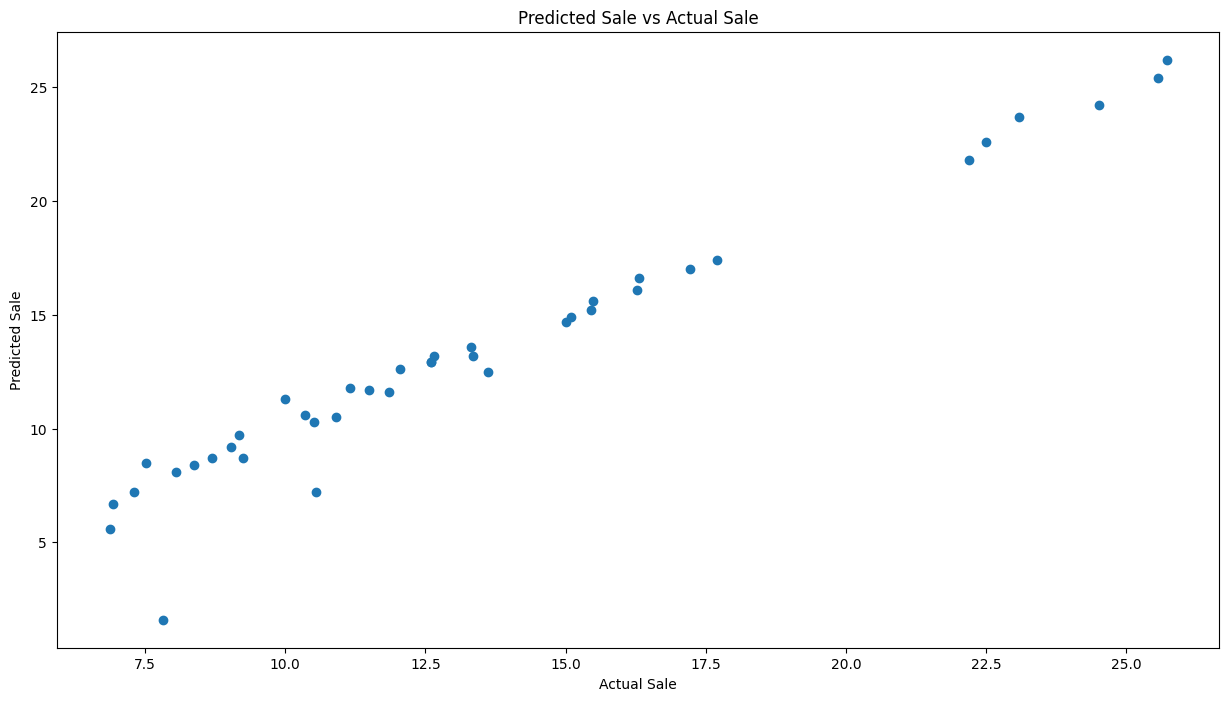

In [28]:
plt.figure(figsize=(15, 8))

plt.scatter(y_pred, y_test.values)

plt.xlabel("Actual Sale")
plt.ylabel("Predicted Sale")

plt.title("Predicted Sale vs Actual Sale")
plt.show()

In [29]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9529173970222473